# Demo: House Price EDA & Linear Regression
A very simple demo to understand the process of EDA & Modelings. Please research other references for much more comprehensive work. 

**References**
* [Linear Regression 📈 House 🏡 price 💵 prediction](https://www.kaggle.com/faressayah/linear-regression-house-price-prediction)

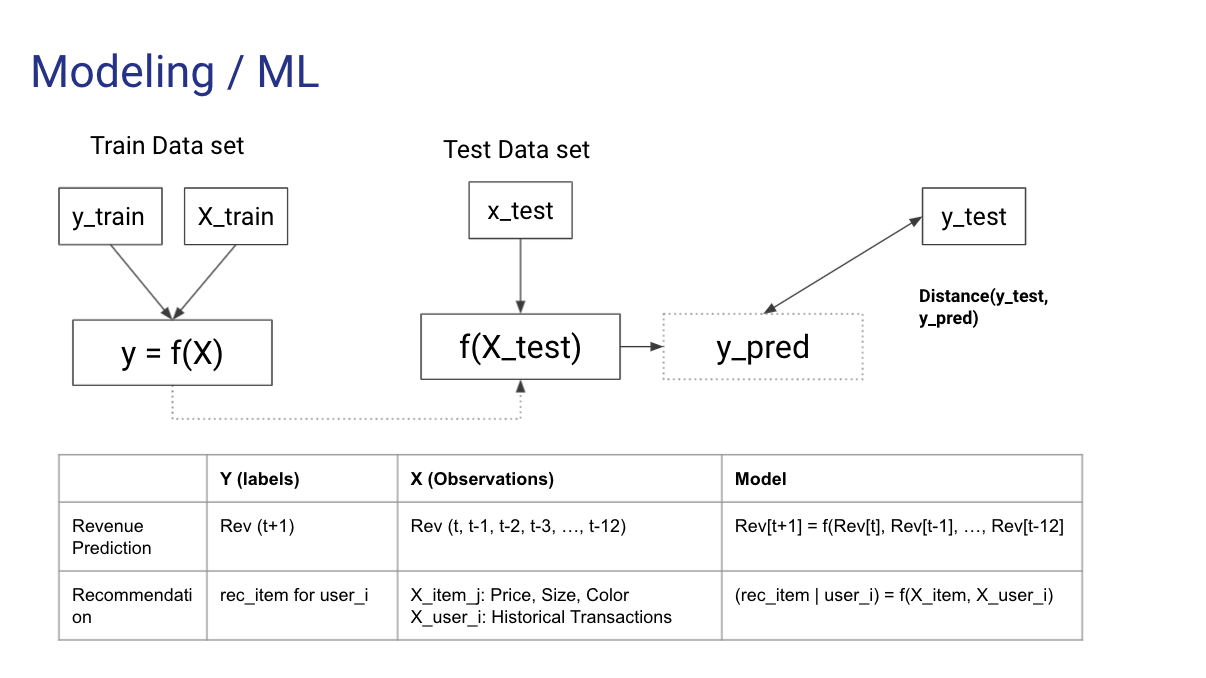

# Data Set Information

First of all, understand the meanings of all columns. In Kaggle, you can go and check `Data Explorer` (unfortunately, it's not available for this dataset).

**Features**

|Feature|Description|
|-----|-----|
|CRIM|per capita crime rate by town|
|ZN|proportion of residential land zoned for lots over 25,000 sq.ft.|
|INDUS|proportion of non-retail business acres per town|
|CHAS|Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
|NOX|nitric oxides concentration (parts per 10 million)|
|RM|average number of rooms per dwelling|
|AGE|proportion of owner-occupied units built prior to 1940|
|DIS|weighted distances to ﬁve Boston employment centers|
|RAD|index of accessibility to radial highways|
|TAX|full-value property-tax rate per 10,000 dollars|
|PTRATIO|pupil-teacher ratio by town |
|B|1000(Bk−0.63)2 where Bk is the proportion of blacks by town| 
|LSTAT|% lower status of the population|
|MEDV|Median value of owner-occupied homes in 1000s dollars|

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-poster')
plt.style.use('fivethirtyeight')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load Data

In [ ]:
data = pd.read_csv('/kaggle/input/boston-house-prices/housing.csv')
data.head()

In [ ]:
# Assigning the name of the column in the form of 'list'
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df= pd.read_csv('../input/boston-house-prices/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

# EDA (Exploratory Data Analysis)
You could use the Auto-profiling Data [HERE](https://share.streamlit.io/anhdanggit/streamlit-data-glimpse/main/app.py)
* **Summary:** Check Data Type, Count of records, Statistics Summary
* **Profiling Report**: 
    - Univariate: Histogram (detect outliers, weird data distribution) & Statistics
    - Interactions: Scatter-Plot
    - Correltations
    - Missing Values

In [ ]:
df.to_csv('/kaggle/working/housing_data.csv',index=False)

# Data Processing: Outliers
This would be based on EDA:
* Outliers (eg: `TAX`): remove or replace outliers >95th percentiles, and <5th percentiles by the values of 5th and 95th
* Distributions: normalize the scale
* Missing: impute (median, or some intuitive values)

In [ ]:
df.LSTAT.hist()
plt.title('Histogram of TAX before treat outliers')

In [ ]:
from scipy.stats.mstats import winsorize

def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    return dataframe    

df1 = df.copy()
df1 = treat_outliers(df1)

In [ ]:
df1.LSTAT.hist()
plt.title('Histogram of TAX after treat outliers')

# Data Processing: y, X

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

# Linear Regression: y = f(X) 
> y = f(X) = coef1 * X1 + coef2 * X2 + ...

In [ ]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
coef=pd.DataFrame([X_train.columns, reg.coef_]).T
coef=coef.rename(columns={0:'Attributes',1:'Coefficients'})
coef

# Predictions: y_pred = f(X_test)

In [ ]:
ytest_pred = reg.predict(X_test)

# Evaluation: y_test vs. y_pred

In [ ]:
from sklearn import metrics
lin_acc=metrics.r2_score(ytest_pred, y_test)
print("R^2: ",lin_acc)
print("MAE: ", metrics.mean_absolute_error(ytest_pred, y_test))
print("MSE: ", metrics.mean_squared_error(ytest_pred, y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest_pred, y_test)))
print("Max Error: ", metrics.max_error(ytest_pred, y_test))

# Evaluation: Visualize

In [ ]:
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, lw=1, color="blue", label="original")
plt.plot(x_ax, ytest_pred, lw=0.8, color="red", label="predicted",marker="o", markersize=4)
plt.legend()
plt.show()

In [ ]:
df_plot = pd.DataFrame({'pred_price': ytest_pred, 'actual_price': y_test})
df_plot.head()

In [ ]:
sns.jointplot(x='pred_price',y='actual_price',data=df_plot,kind='reg')